In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Descriptive statistics

In [3]:
# Get overview data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


With overview table, we can realize that Glucose, BloodPressure, SkinThickness, Insulin, BMI contain zero values. These values are not acceptable and should be replaced with NaN.

In [4]:
# Check data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Overview, we can see that there are 2460 observations and 9 columns in the dataset.

Category variables include:

- Outcome

Numeric variables include:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age

In [5]:
# Fill zero values with NaN
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)

In [6]:
# Check overview data again
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2443.000000,2346.000000,1743.000000,1279.000000,2429.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,122.448219,72.263853,28.977051,154.100860,32.398724,0.491440,32.821951,0.390244
std,3.296458,30.231378,11.821553,10.189228,121.754763,6.958756,0.363917,11.251208,0.487904
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,21.000000,73.000000,27.300000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,120.000000,32.300000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,36.000000,192.000000,36.600000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Check missing values
df.isnull().sum()

Pregnancies                    0
Glucose                       17
BloodPressure                114
SkinThickness                717
Insulin                     1181
BMI                           31
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

### Visualizing the distribution of data

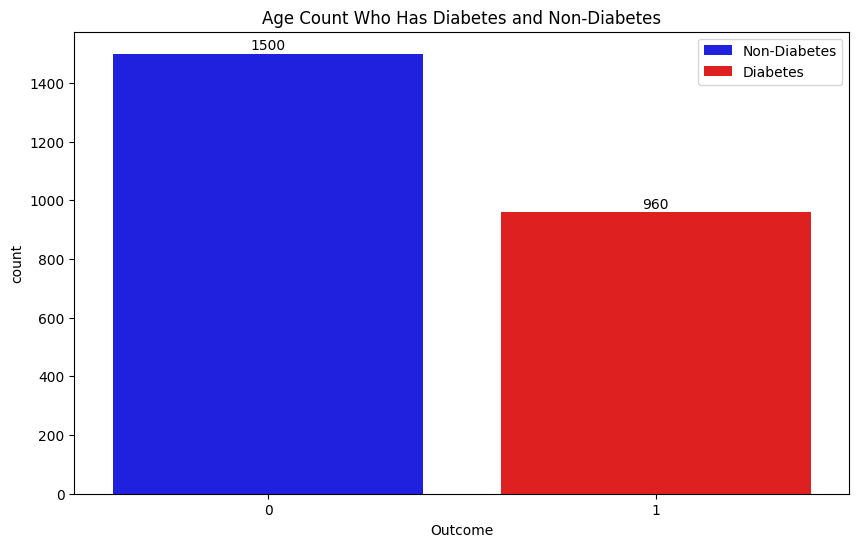

In [8]:
# Overview age count who has diabetes and non-diabetes
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Outcome', data=df, palette=['blue', 'red'])
plt.legend(['Non-Diabetes', 'Diabetes'])
plt.title('Age Count Who Has Diabetes and Non-Diabetes')

# Add count numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()-20), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

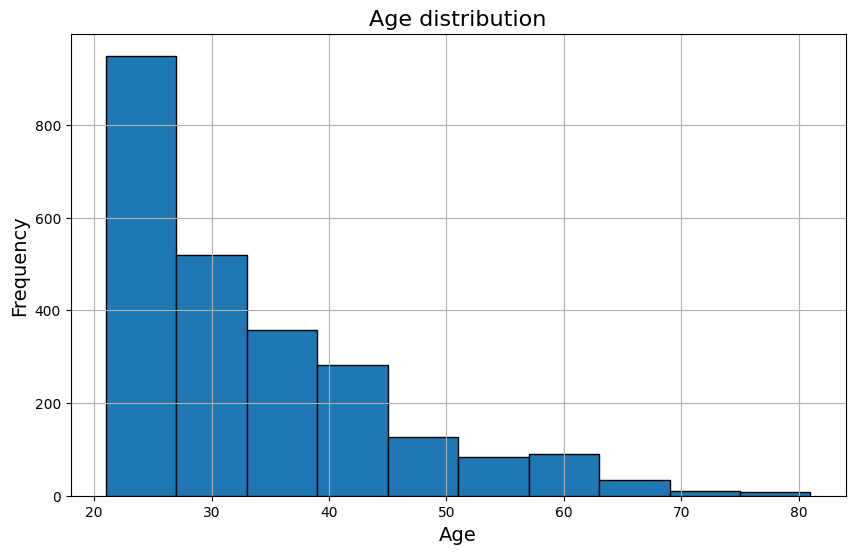

In [9]:
# Visualize the distribution of age 
# plot the hist of the age variable
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age distribution', fontsize=16)

# Create histogram
df['Age'].hist(edgecolor='black')


plt.show()

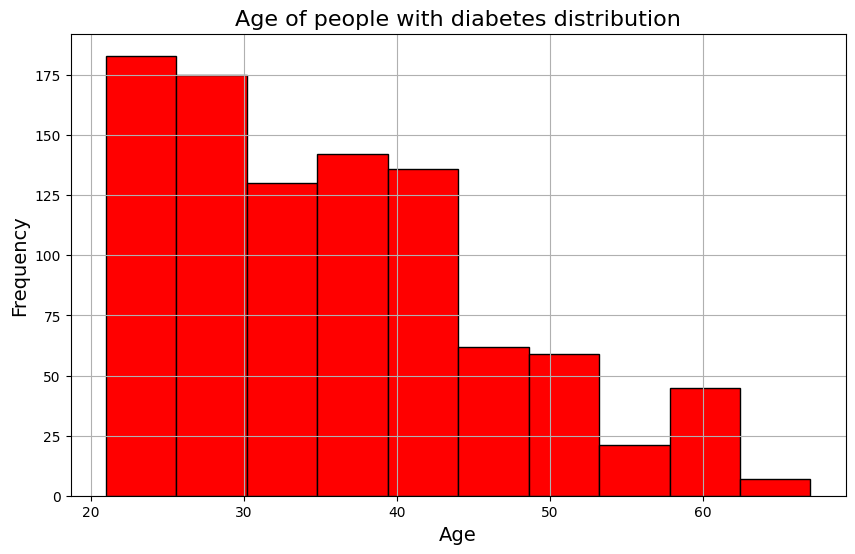

In [10]:
### Visualize the distribution of age of people with diabetes
# Visualize the distribution of age 
# plot the hist of the age variable
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people with diabetes distribution', fontsize=16)

# Create histogram
df[df['Outcome'] == 1]['Age'].hist(edgecolor='black',color='red')


plt.show()

Well, the patients are in groups of about 21 to 45 years old, and most of them are 21 to 30 years old.

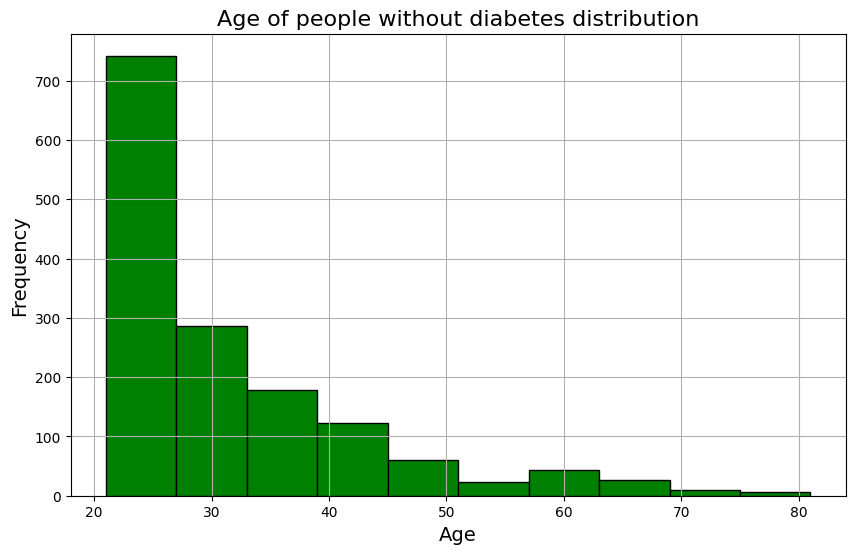

In [11]:
### Visualize the distribution of age of people without diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people without diabetes distribution', fontsize=16)

# Create histogram
df[df['Outcome'] == 0]['Age'].hist(edgecolor='black',color='green')


plt.show()

In this case, I want to use box plot to visualize the distribution of age and find out the outliers.

<Axes: xlabel='Outcome', ylabel='Age'>

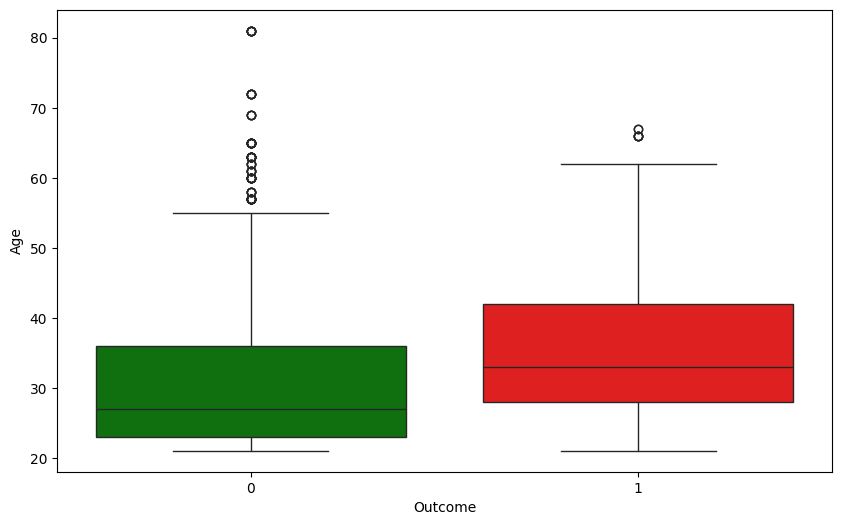

In [12]:
# Box plot for age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=df, palette=['green', 'red'])

We can see that outliners of non diabetic patients are more than diabetic patients and the median of age of diabetic patients is higher than non diabetic patients.

In [13]:
# Find upper bound for age of people with diabetes
IQR = df[df['Outcome'] == 1]['Age'].quantile(0.75) - df[df['Outcome'] == 1]['Age'].quantile(0.25)
upper_bound = df[df['Outcome'] == 1]['Age'].quantile(0.75) + 1.5 * IQR
upper_bound

63.0

In [14]:
outliers = df[(df['Outcome'] == 1) & (df['Age'] > upper_bound)]
print('There are {} outliers in the age of people with diabetes'.format(outliers.shape[0]))
outliers

There are 7 outliers in the age of people with diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
221,2,158.0,90.0,NaN,NaN,31.6,0.805,66,1
363,4,146.0,78.0,NaN,NaN,38.5,0.520,67,1
641,2,158.0,90.0,NaN,NaN,31.6,0.805,66,1
1112,2,158.0,90.0,NaN,NaN,31.6,0.805,66,1
1586,4,146.0,78.0,NaN,NaN,38.5,0.520,67,1
1807,2,158.0,90.0,NaN,NaN,31.6,0.805,66,1
2166,2,158.0,90.0,NaN,NaN,31.6,0.805,66,1


---

In [15]:
# Find upper bound for age of people with non-diabetes
IQR = df[df['Outcome'] == 0]['Age'].quantile(0.75) - df[df['Outcome'] == 1]['Age'].quantile(0.25)
upper_bound = df[df['Outcome'] == 1]['Age'].quantile(0.75) + 1.5 * IQR
upper_bound

54.0

In [16]:
outliers = df[(df['Outcome'] == 0) & (df['Age'] > upper_bound)]
print('There are {} outliers in the age of people with diabetes'.format(outliers.shape[0]))
outliers

There are 96 outliers in the age of people with diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,10,139.0,80.0,NaN,NaN,27.1,1.441,57,0
28,13,145.0,82.0,19.0,110.0,22.2,0.245,57,0
30,5,109.0,75.0,26.0,NaN,36.0,0.546,60,0
123,5,132.0,80.0,NaN,NaN,26.8,0.186,69,0
140,3,128.0,78.0,NaN,NaN,21.1,0.268,55,0
...,...,...,...,...,...,...,...,...,...
2375,2,119.0,NaN,NaN,NaN,19.6,0.832,72,0
2408,3,128.0,78.0,NaN,NaN,21.1,0.268,55,0
2411,7,179.0,95.0,31.0,NaN,34.2,0.164,60,0
2433,9,134.0,74.0,33.0,60.0,25.9,0.460,81,0


I want find the relationship between Insulin of diabetic patients and non diabetic patients. However, we can see that there are many NaN values in Insulin and I find out the relationship between Insulin and Glucose. As a result, I will use Glucose to predict Insulin. 

<Axes: >

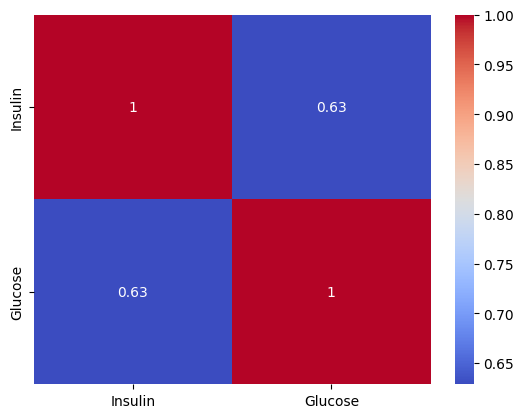

In [17]:
# Find the correlation between Insulin and Glucose
df_without_nana = df.dropna()
df_without_nana[['Insulin', 'Glucose']].corr() # Find the correlation 

# Visualize the correlation between Insulin and Glucose
sns.heatmap(df_without_nana[['Insulin', 'Glucose']].corr(), annot=True, cmap='coolwarm')


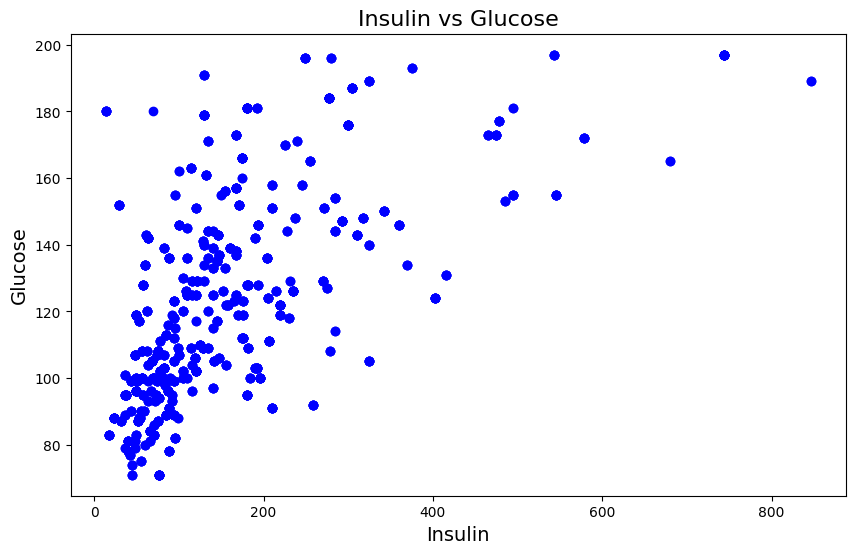

In [18]:
# Visualize using scatter for Insulin and Glucose
plt.figure(figsize=(10, 6))
plt.scatter(df_without_nana['Insulin'], df_without_nana['Glucose'], color='blue')
plt.xlabel('Insulin', fontsize=14)
plt.ylabel('Glucose', fontsize=14)
plt.title('Insulin vs Glucose', fontsize=16)
plt.show()

Well, I realize there are something stranger with Insulin. I will double check using box plot.

<Axes: xlabel='Outcome', ylabel='Insulin'>

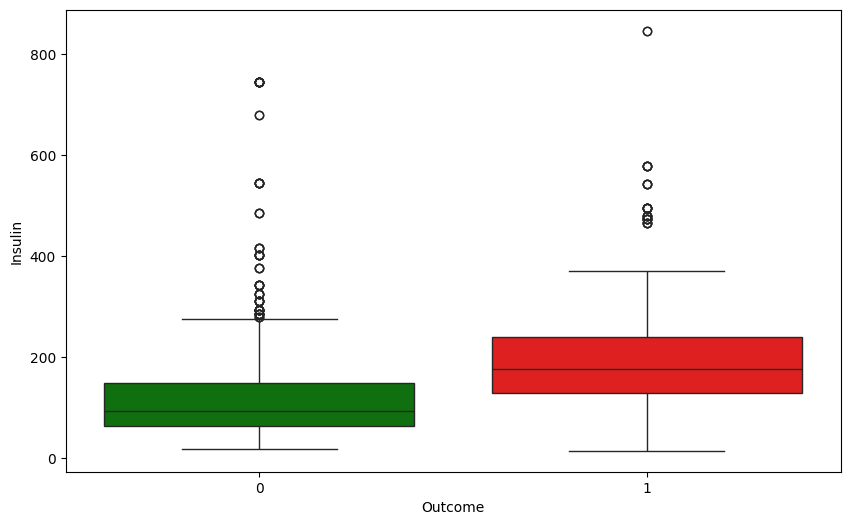

In [19]:
# Insulin box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df_without_nana, palette=['green', 'red'])

In [20]:
# 5 number summary for Insulin of people with non- diabetes
df_without_nana[df['Outcome'] == 0]['Insulin'].describe()

count    801.000000
mean     130.159800
std      116.279091
min       18.000000
25%       63.000000
50%       92.000000
75%      148.000000
max      744.000000
Name: Insulin, dtype: float64

In [21]:
# 5 number summary for Insulin of people with diabetes
df_without_nana[df['Outcome'] == 1]['Insulin'].describe()

count    467.000000
mean     197.404711
std      119.750156
min       14.000000
25%      129.000000
50%      175.000000
75%      240.000000
max      846.000000
Name: Insulin, dtype: float64

From research, I find out that Insulin of normal people after consuming a glucose-rich drink is 16-166 mu U/ml and the diabetes patients have Insulin level will be less than 180 mu U/ml.
Link: https://emedicine.medscape.com/article/2089224-overview?form=fpf

In [22]:
# Find outliers for Insulin of people with non-diabetes
df_without_nana[(df['Outcome'] == 0) & (df['Insulin'] > 148)] # Find outliers


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0
35,4,103.0,60.0,33.0,192.0,24.0,0.966,33,0
54,7,150.0,66.0,42.0,342.0,34.7,0.718,42,0
73,4,129.0,86.0,20.0,270.0,35.1,0.231,23,0
91,4,123.0,80.0,15.0,176.0,32.0,0.443,34,0
...,...,...,...,...,...,...,...,...,...
2432,4,147.0,74.0,25.0,293.0,34.9,0.385,30,0
2443,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0
2445,2,108.0,62.0,10.0,278.0,25.3,0.881,22,0
2447,1,157.0,72.0,21.0,168.0,25.6,0.123,24,0


In [23]:
# # For normal people
# # Replace outliners with random values from 62 to 166
# # Define the condition for outliers
# outliers_condition = (df_without_nana['Outcome'] == 0) & (df_without_nana['Insulin'] > 148)

# # Count the number of outliers
# num_outliers = outliers_condition.sum()

# # Generate random integers between 62 and 166 for each outlier
# random_values = np.random.randint(90, 160, size=num_outliers)

# # Replace outliers with the random values
# df_without_nana.loc[outliers_condition, 'Insulin'] = random_values
    

In [24]:
# # For people with diabetes
# outliers_condition = (df_without_nana['Outcome'] == 1) & (df_without_nana['Insulin'] > 300)

# # Count the number of outliers
# num_outliers = outliers_condition.sum()


# random_values = np.random.randint(161, 240, size=num_outliers)

# # Replace outliers with the random values
# df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

In [25]:
# # For people with diabetes
# outliers_condition = (df_without_nana['Outcome'] == 1) & (df_without_nana['Insulin'] < 80)

# # Count the number of outliers
# num_outliers = outliers_condition.sum()


# random_values = np.random.randint(100, 180, size=num_outliers)

# # Replace outliers with the random values
# df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

After filtering the outliers, double check the box plot of Insulin

In [26]:
# # Insulin box plot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Outcome', y='Insulin', data=df_without_nana, palette=['green', 'red'])
# plt.xlabel('Outcome', fontsize=14)
# plt.ylabel('Insulin', fontsize=14)
# plt.title('Insulin distribution after filtering outliers', fontsize=16)


In [27]:
# fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# # Insulin distribution for Outcome=0
# sns.histplot(data=df_without_nana[df_without_nana['Outcome'] == 0], x='Insulin', kde=True, color='blue', ax=axs[0], bins=20)
# axs[0].set_title('Insulin distribution for Non-Diabetes after filtering outliers', fontsize=16)
# axs[0].set_xlabel('Insulin', fontsize=14)
# axs[0].set_ylabel('Frequency', fontsize=14)

# # Insulin distribution for Outcome=1
# sns.histplot(data=df_without_nana[df_without_nana['Outcome'] == 1], x='Insulin', kde=True, color='red', ax=axs[1],bins=20)
# axs[1].set_title('Insulin distribution for Diabetes after filtering outliers', fontsize=16)
# axs[1].set_xlabel('Insulin', fontsize=14)
# axs[1].set_ylabel('Frequency', fontsize=14)

# plt.tight_layout()

In [28]:
df_without_nana[df_without_nana['Outcome'] == 1]['Insulin'].describe()

count    467.000000
mean     197.404711
std      119.750156
min       14.000000
25%      129.000000
50%      175.000000
75%      240.000000
max      846.000000
Name: Insulin, dtype: float64

In [29]:
df_without_nana[df_without_nana['Outcome'] == 0]['Insulin'].describe()

count    801.000000
mean     130.159800
std      116.279091
min       18.000000
25%       63.000000
50%       92.000000
75%      148.000000
max      744.000000
Name: Insulin, dtype: float64

----

Well, fill with random values maybe not a good idea. I will use group of age to fill the missing values of Insulin.

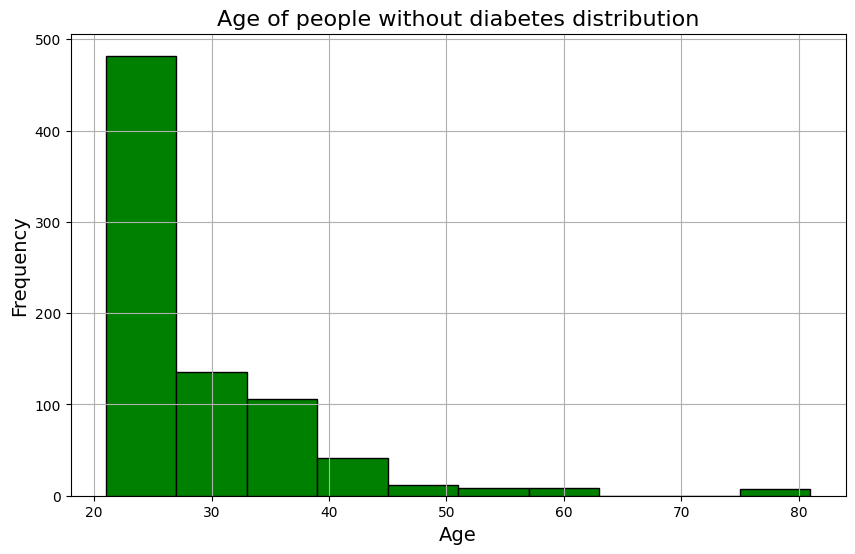

In [30]:
### Visualize the distribution of age of people without diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people without diabetes distribution', fontsize=16)

# Create histogram
df_without_nana[df_without_nana['Outcome'] == 0]['Age'].hist(edgecolor='black',color='green')


plt.show()

In [31]:
# Dropout outliers
df_without_nana_outliers = df_without_nana[df['Outcome'] == 0][df_without_nana['Insulin'] < 148]

Text(0.5, 1.0, 'Insulin vs Age')

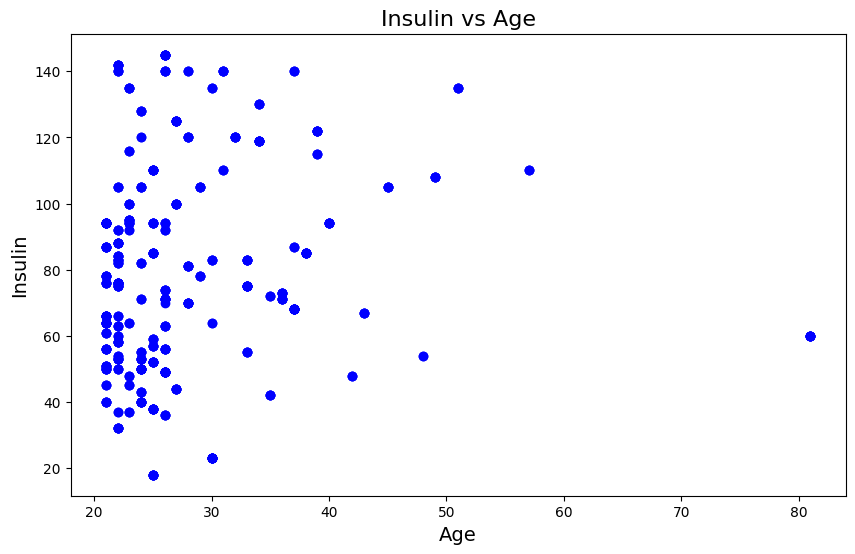

In [32]:
# Scatter plot for Insulin and Age
plt.figure(figsize=(10, 6))
plt.scatter(df_without_nana_outliers['Age'], df_without_nana_outliers['Insulin'], color='blue')
plt.ylabel('Insulin', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Insulin vs Age', fontsize=16)

In [33]:
# Split age into 2 groups
# Group 1: 20 to 28 and compute 5 number summary
group1 = df_without_nana_outliers[(df_without_nana_outliers['Age'] >= 20) & (df_without_nana_outliers['Age'] <= 28)]
group1['Insulin'].describe()

count    419.000000
mean      75.694511
std       30.174964
min       18.000000
25%       52.000000
50%       71.000000
75%       94.000000
max      145.000000
Name: Insulin, dtype: float64

array([[<Axes: title={'center': 'Insulin'}>]], dtype=object)

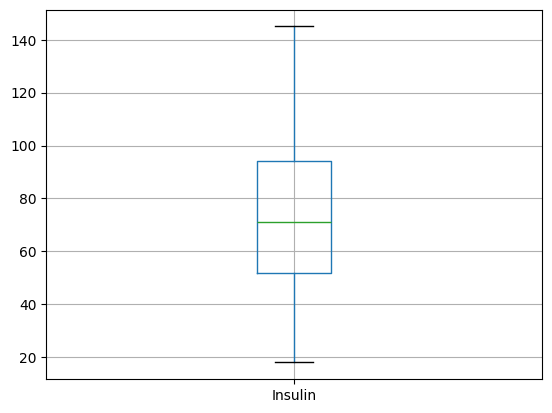

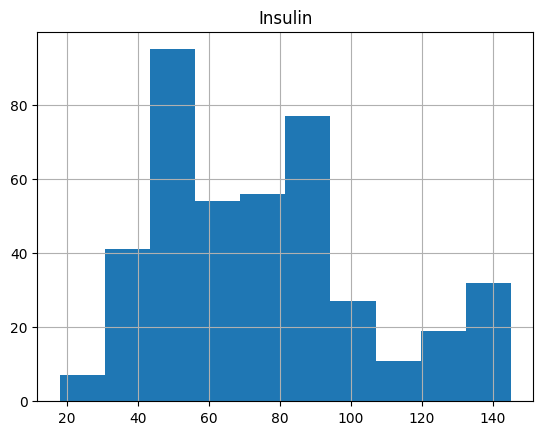

In [34]:
group1.boxplot(column='Insulin')
group1.hist(column='Insulin')

In [35]:
# Group 2: 28 to 90 and compute 5 number summary
group2 = df_without_nana_outliers[(df_without_nana_outliers['Age'] > 28) & (df_without_nana_outliers['Age'] <= 90)]
group2['Insulin'].describe()


count    170.000000
mean      87.129412
std       30.951112
min       23.000000
25%       68.000000
50%       83.000000
75%      113.750000
max      140.000000
Name: Insulin, dtype: float64

array([[<Axes: title={'center': 'Insulin'}>]], dtype=object)

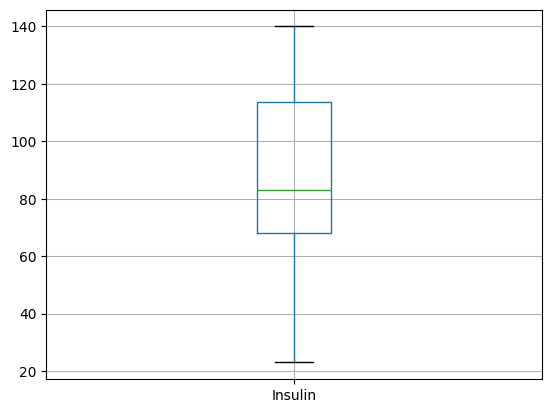

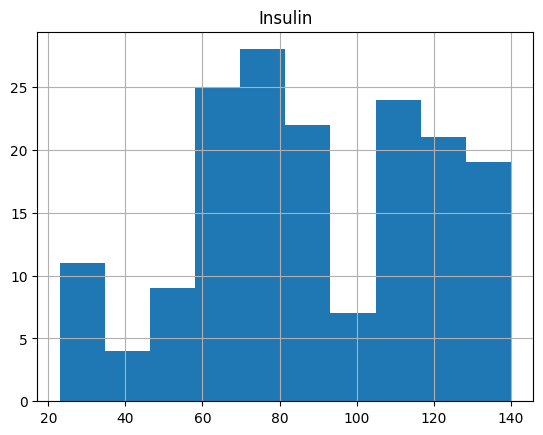

In [36]:
group2.boxplot(column='Insulin')
group2.hist(column='Insulin')

Fill outliners with random values from 25th percentile to 75th percentile of Insulin for group 1

In [37]:
# Without diabetes
# Group 1: 20 to 28
outliers_condition = (df_without_nana['Outcome'] == 0) & (df_without_nana['Age'] > 20) & (df_without_nana['Age'] < 28) & (df_without_nana['Insulin'] > 130)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(60, 94, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 28 to 90
outliers_condition = (df_without_nana['Outcome'] == 0) & (df_without_nana['Age'] >= 28) & (df_without_nana['Age'] < 90) & (df_without_nana['Insulin'] > 130)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(68, 114, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

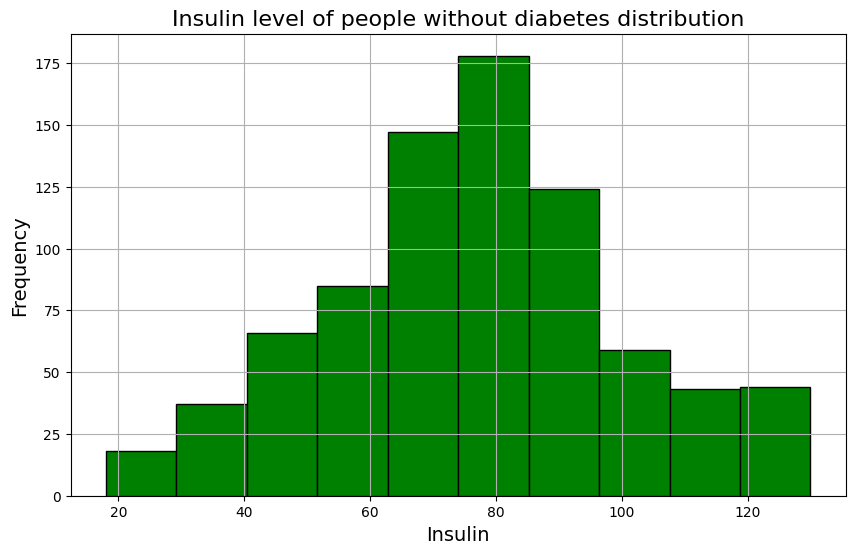

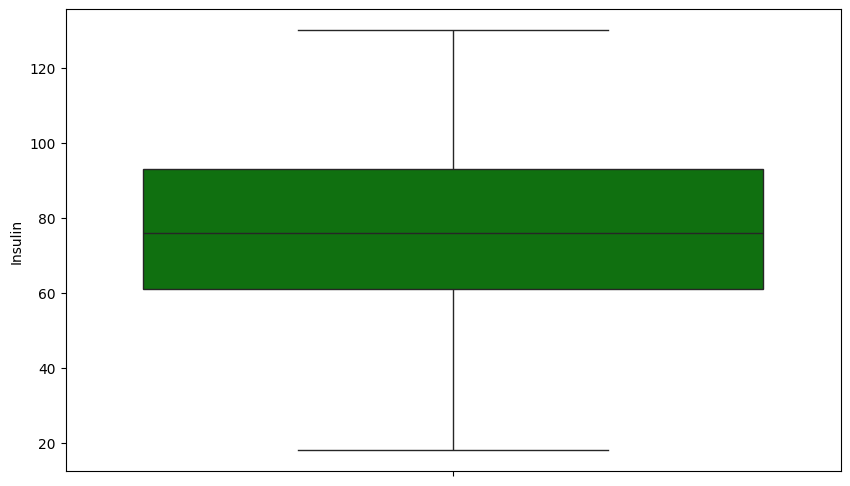

In [38]:
# Visualize the distribution of insulin of people without diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Insulin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Insulin level of people without diabetes distribution', fontsize=16)

# Create histogram
df_without_nana[df_without_nana['Outcome'] == 0]['Insulin'].hist(edgecolor='black',color='green', bins = 10)

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_without_nana[df_without_nana['Outcome'] == 0]['Insulin'], color='green')
plt.show()

Text(0.5, 1.0, 'Q-Q plot for Insulin of people without diabetes')

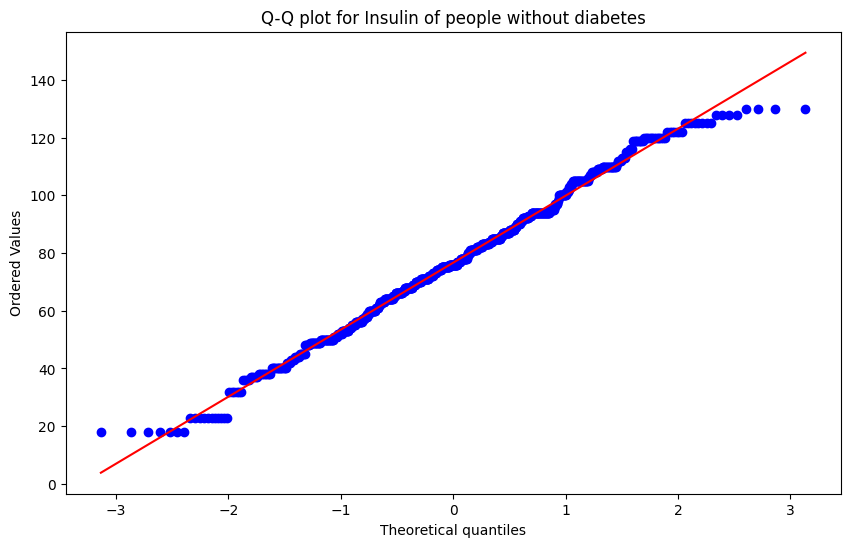

In [39]:
# qq plot for Insulin of people without diabetes
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
stats.probplot(df_without_nana[df_without_nana['Outcome'] == 0]['Insulin'], dist="norm", plot=plt)
plt.title('Q-Q plot for Insulin of people without diabetes')

Well, we can see that fill outliners with random values from 25th percentile to 75th percentile of Insulin for group 1 is a good idea. With qq plot, we can see that the distribution of Insulin is nearly normal, and we will assume that the distribution of Insulin is normal.

---

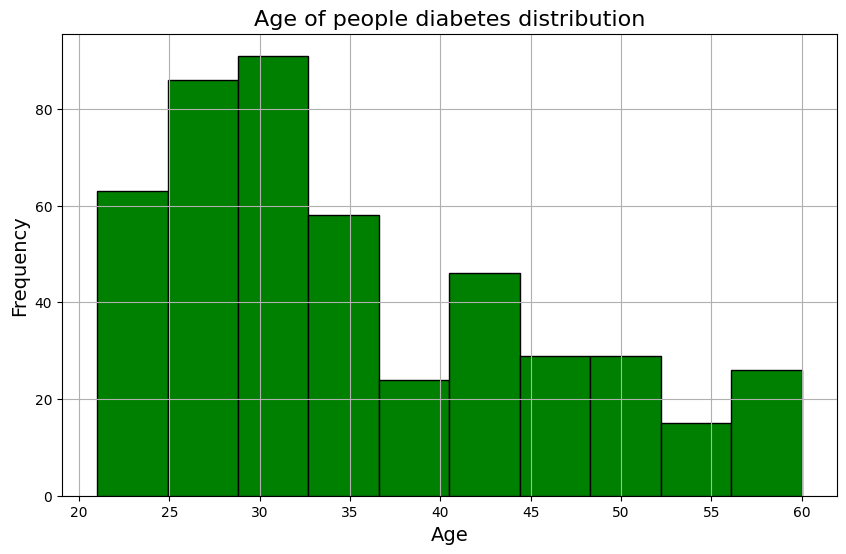

In [40]:

### Visualize the distribution of age of people diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people diabetes distribution', fontsize=16)

# Create histogram
df_without_nana[df_without_nana['Outcome'] == 1]['Age'].hist(edgecolor='black',color='green')


plt.show()

In [41]:
# Dropout outliers
df_without_nana_outliers = df_without_nana[(df_without_nana['Outcome'] == 0) & (df_without_nana['Insulin'] < 300) & (df_without_nana['Insulin'] > 80)]

Text(0.5, 1.0, 'Insulin vs Age')

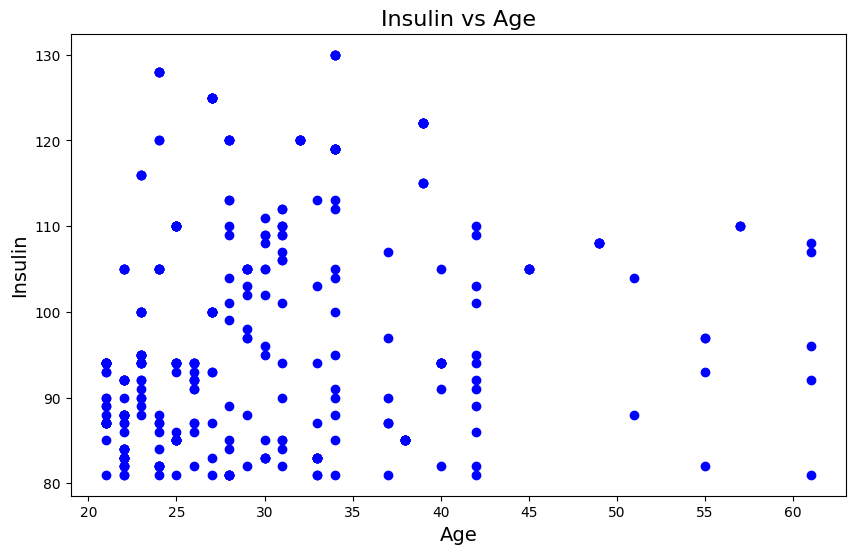

In [42]:
# Scatter plot for Insulin and Age
plt.figure(figsize=(10, 6))
plt.scatter(df_without_nana_outliers['Age'], df_without_nana_outliers['Insulin'], color='blue')
plt.ylabel('Insulin', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Insulin vs Age', fontsize=16)

I will divide 2 groups of age: group 1 (21 to 35) and group 2 (35 to 65)

In [43]:
group1 = df_without_nana_outliers[(df_without_nana_outliers['Age'] >= 20) & (df_without_nana_outliers['Age'] < 35)]
group1['Insulin'].describe()

count    280.000000
mean      97.267857
std       13.464531
min       81.000000
25%       86.000000
50%       94.000000
75%      105.000000
max      130.000000
Name: Insulin, dtype: float64

array([[<Axes: title={'center': 'Insulin'}>]], dtype=object)

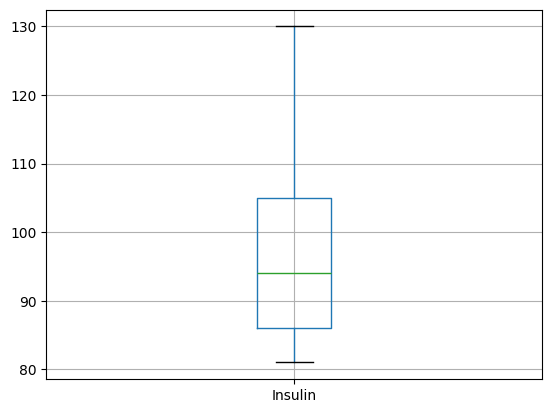

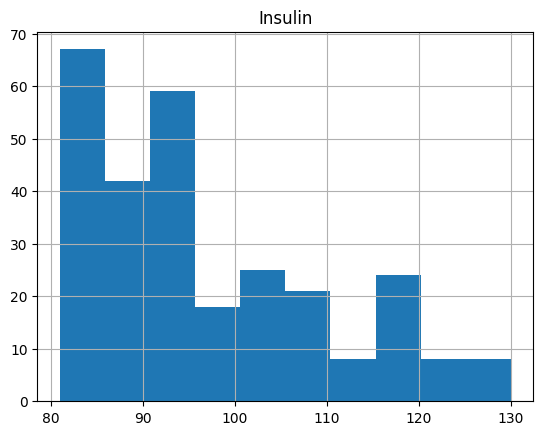

In [44]:
group1.boxplot(column='Insulin')
group1.hist(column='Insulin')

In [45]:
group2 = df_without_nana_outliers[(df_without_nana_outliers['Age'] >= 35) & (df_without_nana_outliers['Age'] <= 70)]
group2['Insulin'].describe()

count     72.000000
mean      98.736111
std       12.407396
min       81.000000
25%       87.000000
50%       95.500000
75%      108.000000
max      122.000000
Name: Insulin, dtype: float64

array([[<Axes: title={'center': 'Insulin'}>]], dtype=object)

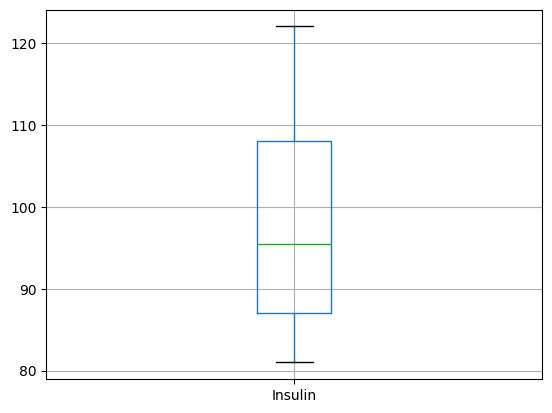

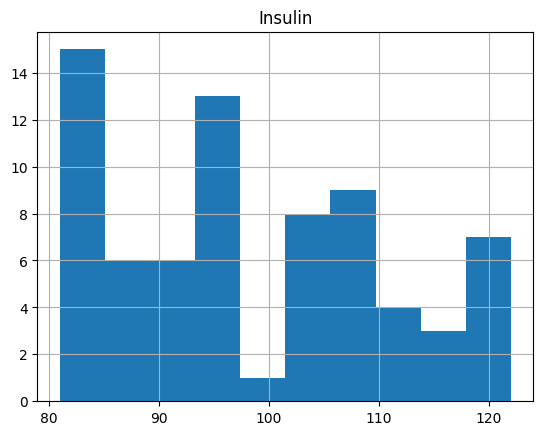

In [46]:
group2.boxplot(column='Insulin')
group2.hist(column='Insulin')

In [47]:
# With diabetes
# Group 1: 21 to 35
outliers_condition = (df_without_nana['Outcome'] == 1) & (df_without_nana['Age'] >= 21) & (df_without_nana['Age'] < 35) & (df_without_nana['Insulin'] > 270)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(105, 130, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 35 to 80
outliers_condition = (df_without_nana['Outcome'] == 1) & (df_without_nana['Age'] >= 35) & (df_without_nana['Age'] <= 70) & (df_without_nana['Insulin'] > 270)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(100, 123, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

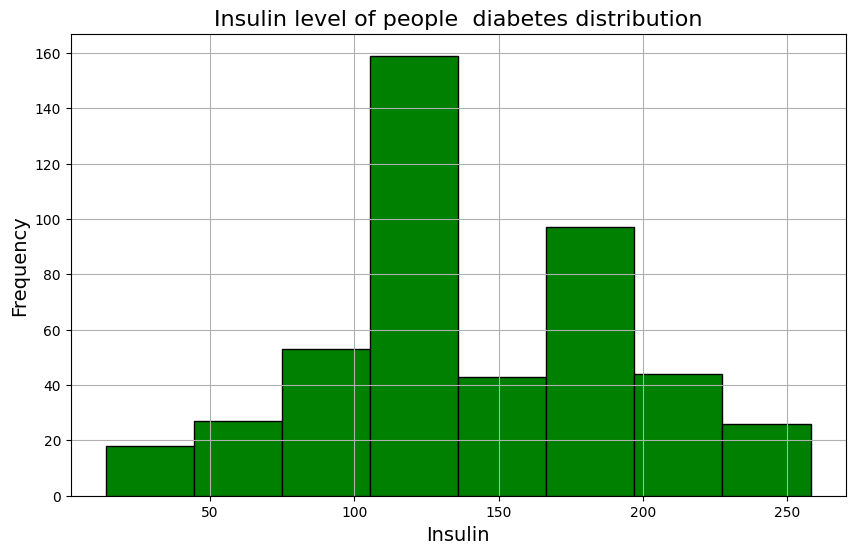

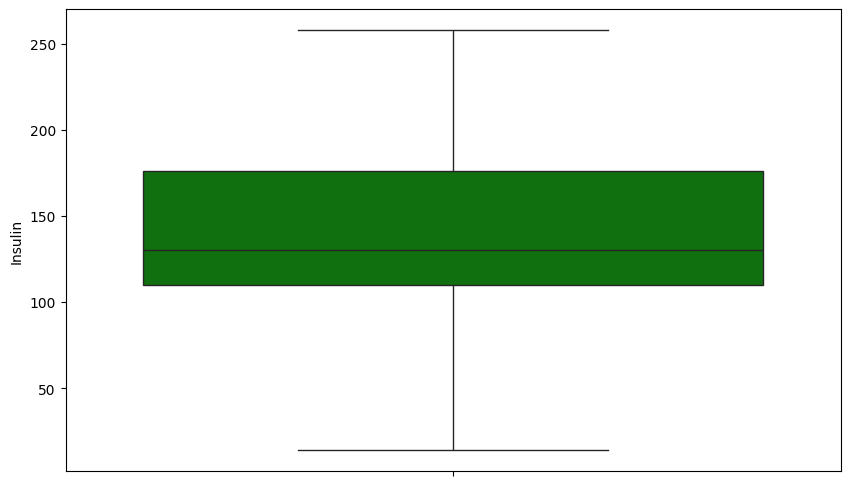

In [48]:
# Visualize the distribution of insulin of people with diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Insulin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Insulin level of people  diabetes distribution', fontsize=16)

# Create histogram
df_without_nana[df_without_nana['Outcome'] == 1]['Insulin'].hist(edgecolor='black',color='green', bins = 8)

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_without_nana[df_without_nana['Outcome'] == 1]['Insulin'], color='green')
plt.show()

Text(0.5, 1.0, 'Q-Q plot for Insulin of people without diabetes')

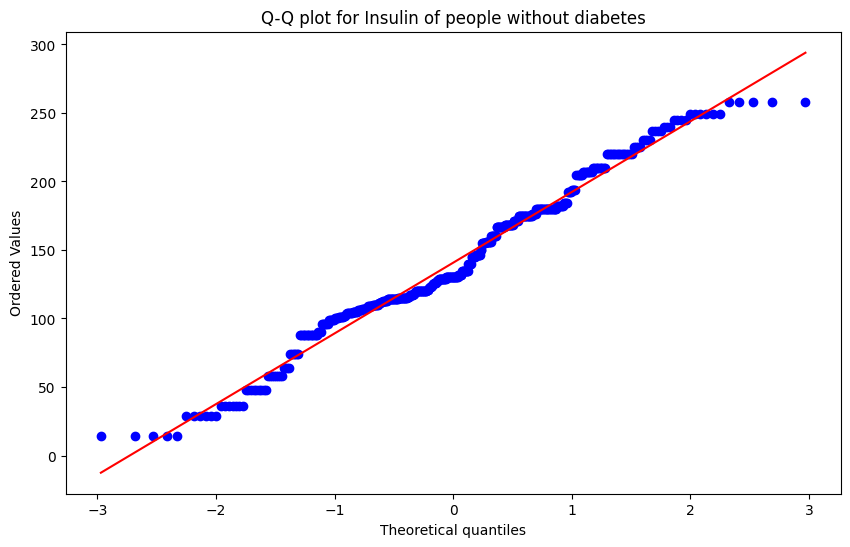

In [49]:
# qq plot for Insulin of people without diabetes
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
stats.probplot(df_without_nana[df_without_nana['Outcome'] == 1]['Insulin'], dist="norm", plot=plt)
plt.title('Q-Q plot for Insulin of people without diabetes')

## Done with fill outliners of Insulin and next we will deal with NaN with same method.

---

---

# Fill NaN values of Insulin

In [50]:
df.update(df_without_nana)

In [51]:
df[df['Outcome']==1]['Insulin'].describe()

count    467.000000
mean     140.689507
std       51.816488
min       14.000000
25%      110.000000
50%      130.000000
75%      176.000000
max      258.000000
Name: Insulin, dtype: float64

In [52]:
130 + 1.5 * (130 - 107)

164.5

In [53]:
df.isna().sum()

Pregnancies                    0
Glucose                       17
BloodPressure                114
SkinThickness                717
Insulin                     1181
BMI                           31
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

In [54]:
# Fill Glucose with mean
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)

In [55]:
# Correlation between Glucose and Insulin
df[['Glucose', 'Insulin']].corr()

,Glucose,Insulin
Glucose,1.000000,0.419906
Insulin,0.419906,1.000000


In [56]:
## Find data when insulin is missing
df[df['Insulin'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
2446,1,97.0,70.0,15.0,NaN,18.2,0.147,21,0
2451,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
2453,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
2454,2,99.0,NaN,NaN,NaN,22.2,0.108,23,0


In [57]:
# Find data when Outcome is 0 and Insulin is missing
df[(df['Outcome'] == 0) & (df['Insulin'].isna())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0
12,10,139.0,80.0,NaN,NaN,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
2437,8,95.0,72.0,NaN,NaN,36.8,0.485,57,0
2440,4,97.0,60.0,23.0,NaN,28.2,0.443,22,0
2446,1,97.0,70.0,15.0,NaN,18.2,0.147,21,0
2451,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


<Axes: title={'center': 'Age of people with non-diabetes and insulin is missing distribution'}, xlabel='Age', ylabel='Frequency'>

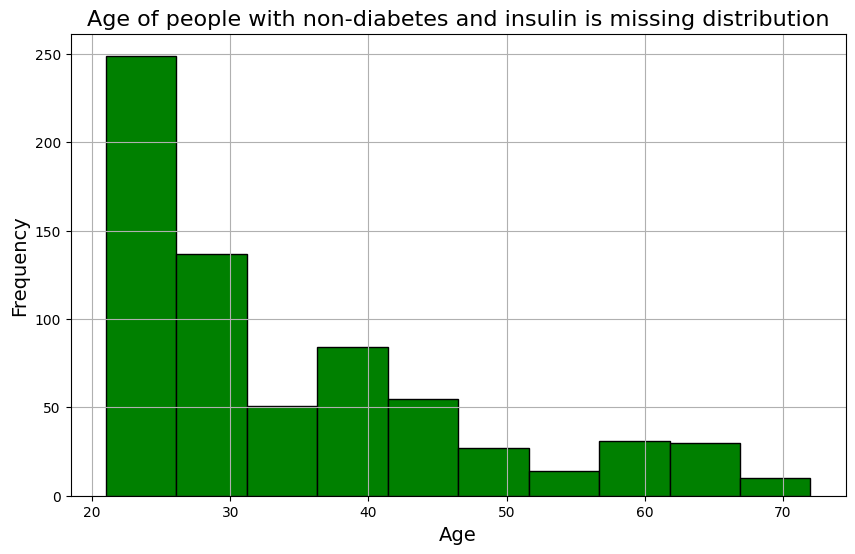

In [58]:
# Visualize the distribution of Age of people with non-diabetes and insulin is missing
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people with non-diabetes and insulin is missing distribution', fontsize=16)

# Create histogram
df[(df['Outcome'] == 0) & (df['Insulin'].isna())]['Age'].hist(edgecolor='black',color='green', bins = 10)

I will fill NaN values of Insulin with random values from 25th percentile to 75th percentile of Insulin for group 1 and group 2. (same method with fill outliners)

---

In [59]:
# Without diabetes
# Group 1: 20 to 28
outliers_condition = (df['Outcome'] == 0) & (df['Age'] > 20) & (df['Age'] < 28) & (df['Insulin'].isna())
num_outliers = outliers_condition.sum()
random_values = np.random.randint(60, 94, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 28 to 90
outliers_condition = (df['Outcome'] == 0) & (df['Age'] >= 28) & (df['Age'] < 90) & (df['Insulin'].isna())
num_outliers = outliers_condition.sum()
random_values = np.random.randint(68, 114, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

In [60]:
# Find data when Outcome is 1 and Insulin is missing
df[(df['Outcome'] == 1) & (df['Insulin'].isna())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
11,10,168.0,74.0,NaN,NaN,38.0,0.537,34,1
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1
...,...,...,...,...,...,...,...,...,...
2436,0,131.0,88.0,NaN,NaN,31.6,0.743,32,1
2439,13,126.0,90.0,NaN,NaN,43.4,0.583,42,1
2441,0,131.0,66.0,40.0,NaN,34.3,0.196,22,1
2453,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


<Axes: title={'center': 'Age of people with diabetes and insulin is missing distribution'}, xlabel='Age', ylabel='Frequency'>

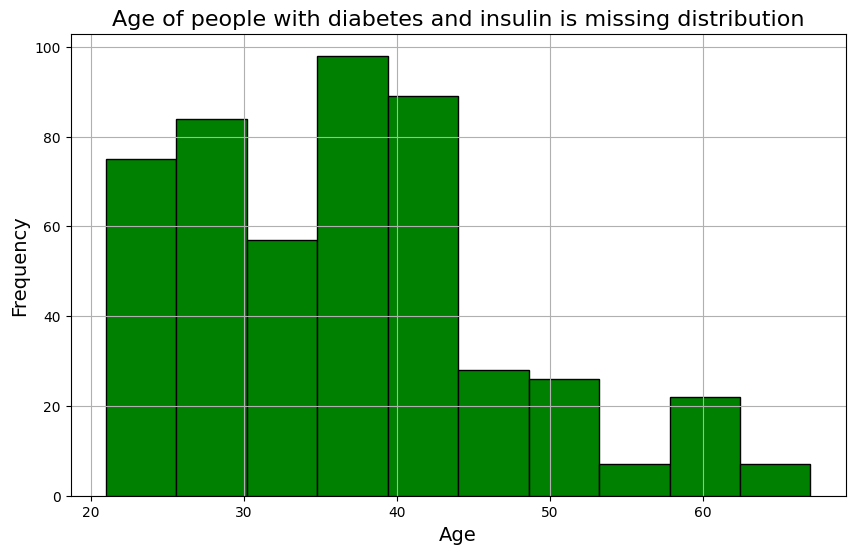

In [61]:
# Visualize the distribution of Age of people with non-diabetes and insulin is missing
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people with diabetes and insulin is missing distribution', fontsize=16)

# Create histogram
df[(df['Outcome'] == 1) & (df['Insulin'].isna())]['Age'].hist(edgecolor='black',color='green', bins = 10)

In [62]:
# With diabetes
# Group 1: 21 to 35
outliers_condition = (df['Outcome'] == 1) & (df['Age'] >= 21) & (df['Age'] < 35) & (df['Insulin'].isna())
num_outliers = outliers_condition.sum()
random_values = np.random.randint(105, 130, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 35 to 80
outliers_condition = (df['Outcome'] == 1) & (df['Age'] >= 35) & (df['Age'] <= 80) & (df['Insulin'].isna())
num_outliers = outliers_condition.sum()
random_values = np.random.randint(100, 123, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

In [63]:
# With diabetes
# Group 1: 21 to 35
outliers_condition = (df['Outcome'] == 1) & (df['Age'] >= 21) & (df['Age'] < 35) & (df['Insulin'].isna())
num_outliers = outliers_condition.sum()
random_values = np.random.randint(105, 130, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 35 to 80
outliers_condition = (df['Outcome'] == 1) & (df['Age'] >= 35) & (df['Age'] <= 80) & (df['Insulin'].isna())
num_outliers = outliers_condition.sum()
random_values = np.random.randint(100, 123, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

In [64]:
# With diabetes
# Group 1: 21 to 35
outliers_condition = (df['Outcome'] == 1) & (df['Age'] >= 21) & (df['Age'] < 35) & (df['Insulin'] > 180)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(125, 160, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 35 to 80
outliers_condition = (df['Outcome'] == 1) & (df['Age'] >= 35) & (df['Age'] <= 80) & (df['Insulin'] > 180)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(120, 160, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values


# With diabetes
# Group 1: 21 to 35
outliers_condition = (df['Outcome'] == 1) & (df['Age'] >= 21) & (df['Age'] < 35) & (df['Insulin'] < 75)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(125, 160, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 35 to 80
outliers_condition = (df['Outcome'] == 1) & (df['Age'] >= 35) & (df['Age'] <= 80) & (df['Insulin'] < 75)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(120, 160, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

<Axes: xlabel='Outcome', ylabel='Insulin'>

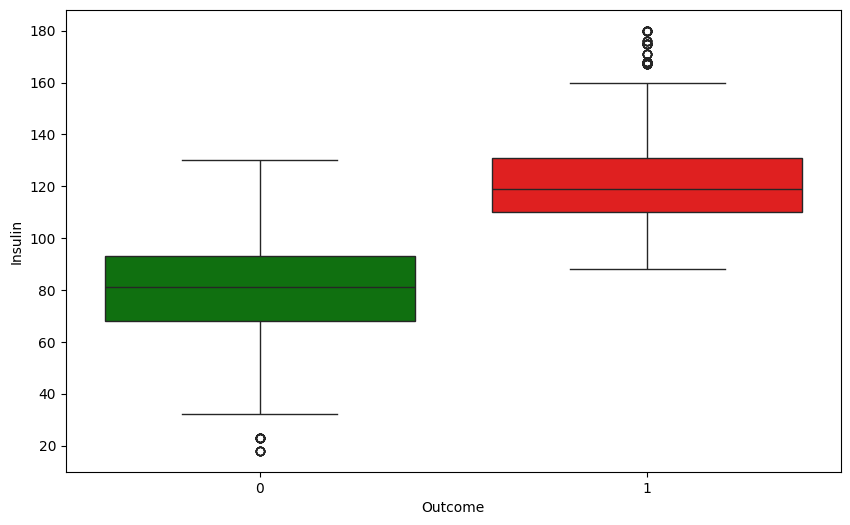

In [65]:
# Box plot for Insulin
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df, palette=['green', 'red'])


Text(0.5, 1.0, 'Q-Q plot for Insulin')

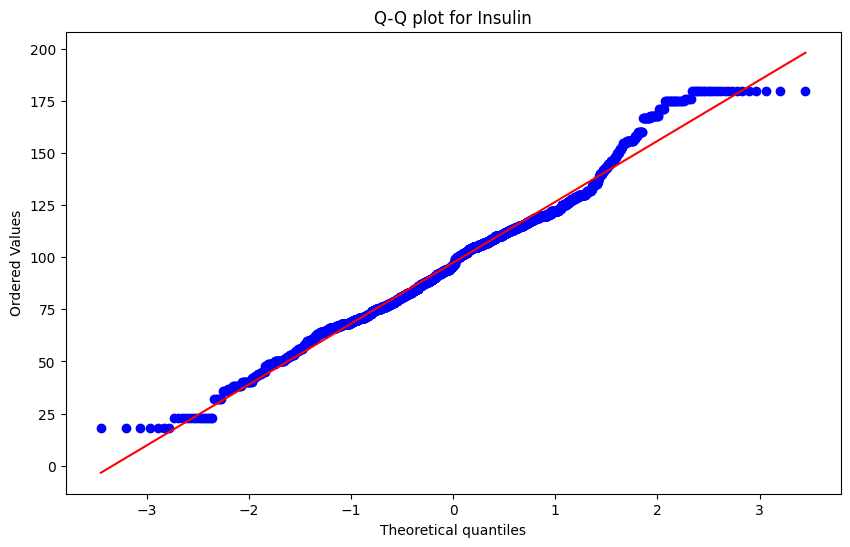

In [66]:
## qq plot for Insulin
plt.figure(figsize=(10, 6))
stats.probplot(df['Insulin'], dist="norm", plot=plt)
plt.title('Q-Q plot for Insulin')


Well done with fill NaN values and Outliners of Insulin, and the we use qq plot to check the distribution of Insulin. As a result, the distribution of Insulin is nearly normal. So we will assume that the distribution of Insulin is normal. However, coorelation between Insulin and Glucose is 0.43 that is so slow. We will check Glucose in next part

---
# Checking Glucose variable

Testing the relationship between Glucose and Insulin

In [70]:
# Correlation between Glucose and Insulin
df[['Glucose', 'Insulin']].corr()


,Glucose,Insulin
Glucose,1.000000,0.430098
Insulin,0.430098,1.000000


Text(0.5, 1.0, 'Glucose vs Insulin')

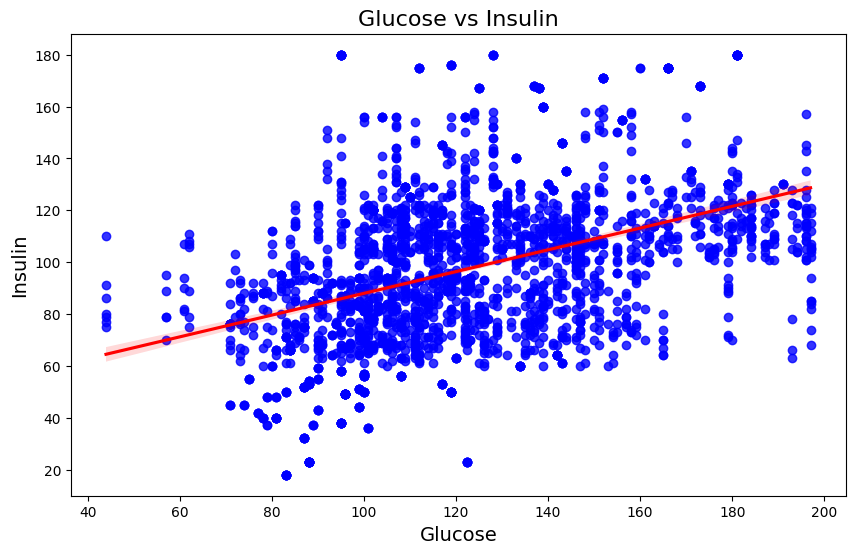

In [69]:
# Visualize the scatter plot for Glucose and Insulin and linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Glucose', y='Insulin', data=df, color='blue', line_kws={'color': 'red'})
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('Insulin', fontsize=14)
plt.title('Glucose vs Insulin', fontsize=16)


Well, we can see that the relationship between Glucose and Insulin is not strong with 0.43. However, If we conclude there is no relationship between Glucose and Insulin, it may have bias. There are a lot of researches that show the relationship between Glucose and Insulin. So, we do a hypothesis test to double check the relationship between Glucose and Insulin.

Hypothesis test: Glucose and Insulin are independent

H0: Glucose and Insulin are independent

H1: Glucose and Insulin are dependent

In [75]:
# Pearson correlation (if  p-value is less than 0.05, it indicates a significant linear relationship.)
pearson_corr, pearson_p_value = stats.pearsonr(df['Glucose'], df['Insulin'])

print(f'Pearson correlation coefficient: {pearson_corr}')
print(f'P-value: {pearson_p_value}')


Pearson correlation coefficient: 0.43009770617209947
P-value: 2.4855290272542416e-111


In [76]:
# Spearman correlation ( If the p-value is less than 0.05, it indicates a significant monotonic relationship.)
spearman_corr, spearman_p_value = stats.spearmanr(df['Glucose'], df['Insulin'])

print(f'Spearman correlation coefficient: {spearman_corr}')
print(f'P-value: {spearman_p_value}')


Spearman correlation coefficient: 0.46302305965910184
P-value: 5.617253781352986e-131


Both correlation and hypothesis test show that the p-value is less than 0.05, so we reject the null hypothesis. As a result, Glucose and Insulin are dependent.

---

Null Hypothesis (H0): There is no significant difference in mean glucose levels between diabetic and non-diabetic individuals.

Alternative Hypothesis (H1): There is a significant difference in mean glucose levels between diabetic and non-diabetic individuals.

Text(0, 0.5, 'Glucose')

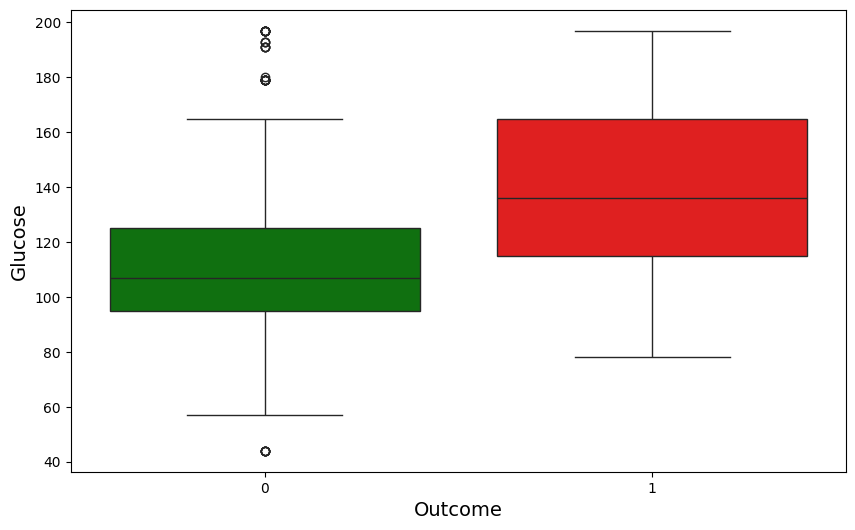

In [80]:
# Box plot for Glucose
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette=['green', 'red'])
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Glucose', fontsize=14)


In [81]:
# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(glucose_non_diabetic, glucose_diabetic, equal_var=False)  # Welch's t-test

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean glucose levels between diabetic and non-diabetic individuals.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean glucose levels between diabetic and non-diabetic individuals.")

T-statistic: -24.678195703960323
P-value: 4.9765758198322895e-116
Reject the null hypothesis: There is a significant difference in mean glucose levels between diabetic and non-diabetic individuals.


---

Find 95% confidence interval of Glucose for diabetic and non diabetic patients

In [83]:
# Separate the glucose levels into two groups
glucose_non_diabetic = df[df['Outcome'] == 0]['Glucose']
glucose_diabetic = df[df['Outcome'] == 1]['Glucose']

def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)  # Standard error of the mean
    h = std_err * stats.t.ppf((1 + confidence) / 2., n-1)  # Margin of error
    return mean, mean - h, mean + h

# Calculate for non-diabetic patients
mean_non_diabetic, ci_lower_non_diabetic, ci_upper_non_diabetic = confidence_interval(glucose_non_diabetic)

# Calculate for diabetic patients
mean_diabetic, ci_lower_diabetic, ci_upper_diabetic = confidence_interval(glucose_diabetic)

print(f'Non-diabetic: Mean = {round(mean_non_diabetic,2)}, 95% CI = ({round(ci_lower_non_diabetic,2)}, {round(ci_upper_non_diabetic,2)})')
print(f'Diabetic: Mean = {round(mean_diabetic,2)}, 95% CI = ({round(ci_lower_diabetic,2)}, {round(ci_upper_diabetic,2)})')


Non-diabetic: Mean = 111.39, 95% CI = (110.13, 112.65)
Diabetic: Mean = 139.72, 95% CI = (137.86, 141.59)
